<a href="https://colab.research.google.com/github/13gi/skillfactory_rds/blob/master/other/Gorg2gorg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

import pandas as pd
import re
import random

import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

%matplotlib inline

# Экспериментальные выкладки


## операции с множествамии

In [ ]:
# текущие
current_id = {1, 2, 3, 4, 5, 6, 7}

# предыдущие
last_id = {9, 8, 7, 6, 100}

# пересечение
current_id & last_id

{6, 7}

In [ ]:
random.randint(1, 100)

19

In [ ]:
random.sample(range(100), 10)

[96, 29, 11, 24, 10, 98, 2, 88, 77, 8]

In [21]:
def crossing_result(list_1, list_2):
    A = set()
    B = set()
    if type(list_1) is list: 
       A.update(list_1)
    else:
        return False
    if type(list_2) is list:
        B.update(list_2)
    else:
        return False
    return sorted(A & B)


all_device = range(1, 20)
last_red = []

for i in range(10):
    red_status_device = random.sample(all_device, random.randint(0, 7))
    print('Step:', i)
    print('  Last:   ', sorted(last_red))
    print('  Current:', sorted(red_status_device))
    
    crossing_id = crossing_result(red_status_device, last_red)

    if len(crossing_id) > 0:
        print(' Crossing:', crossing_id)
    else:
        print(' Crossing: NOT DETECT')
    
    last_red = red_status_device
    print('-' * 55)



Step: 0
  Last:    []
  Current: [7, 10, 13, 15, 19]
 Crossing: NOT DETECT
-------------------------------------------------------
Step: 1
  Last:    [7, 10, 13, 15, 19]
  Current: [2, 3, 8, 13, 14, 17, 19]
 Crossing: [13, 19]
-------------------------------------------------------
Step: 2
  Last:    [2, 3, 8, 13, 14, 17, 19]
  Current: [7, 9, 14, 19]
 Crossing: [14, 19]
-------------------------------------------------------
Step: 3
  Last:    [7, 9, 14, 19]
  Current: [3, 9, 10, 15, 16, 17]
 Crossing: [9]
-------------------------------------------------------
Step: 4
  Last:    [3, 9, 10, 15, 16, 17]
  Current: [2, 17]
 Crossing: [17]
-------------------------------------------------------
Step: 5
  Last:    [2, 17]
  Current: [1, 11]
 Crossing: NOT DETECT
-------------------------------------------------------
Step: 6
  Last:    [1, 11]
  Current: [7]
 Crossing: NOT DETECT
-------------------------------------------------------
Step: 7
  Last:    [7]
  Current: [2, 4, 9, 12, 13]
 C

In [4]:


# текущие
current_id = [1, 2, 3, 4, 5, 6, 7]

# предыдущие
last_id = [9, 8, 7, 6, 100]

print(crossing_result(current_id, last_id))


[6, 7]


In [ ]:
red_status_device = set()
last_red = set()

all_device = range(1, 20)

for i in range(10):
    red_status_device.update(random.sample(all_device, random.randint(0, 7)))
    print('Step:', i, '|RED DevID:', sorted(red_status_device))
    print('\t Last DevID:', sorted(last_red))
    
    crossing_id = red_status_device & last_red
    if len(crossing_id) > 0:
        print('\t Crossing DevID: ', sorted(red_status_device & last_red))
    else:
        print('\t Crossing DevID: NOT DETECT')
    last_red.clear()
    last_red.update(red_status_device)
    red_status_device.clear()




Step: 0 |RED DevID: [1, 2, 3, 7, 12, 16]
	 Last DevID: []
	 Crossing DevID: NOT DETECT
Step: 1 |RED DevID: []
	 Last DevID: [1, 2, 3, 7, 12, 16]
	 Crossing DevID: NOT DETECT
Step: 2 |RED DevID: [1, 10, 13, 15, 19]
	 Last DevID: []
	 Crossing DevID: NOT DETECT
Step: 3 |RED DevID: [6, 7, 9, 10, 12, 19]
	 Last DevID: [1, 10, 13, 15, 19]
	 Crossing DevID:  [10, 19]
Step: 4 |RED DevID: [3, 11, 12, 14]
	 Last DevID: [6, 7, 9, 10, 12, 19]
	 Crossing DevID:  [12]
Step: 5 |RED DevID: [1, 6, 9, 12, 16, 17, 19]
	 Last DevID: [3, 11, 12, 14]
	 Crossing DevID:  [12]
Step: 6 |RED DevID: [4, 5, 9, 13, 15]
	 Last DevID: [1, 6, 9, 12, 16, 17, 19]
	 Crossing DevID:  [9]
Step: 7 |RED DevID: [1, 5, 10, 11, 18]
	 Last DevID: [4, 5, 9, 13, 15]
	 Crossing DevID:  [5]
Step: 8 |RED DevID: [3, 8]
	 Last DevID: [1, 5, 10, 11, 18]
	 Crossing DevID: NOT DETECT
Step: 9 |RED DevID: [2, 6, 10, 12, 15, 16, 18]
	 Last DevID: [3, 8]
	 Crossing DevID: NOT DETECT


## Start

### Вариант 1 - basic

In [ ]:
# генерация массива входных данных

start_time = 1592020420
sum = start_time
time = []
count_sample = 50
delta_period = 120

time_list = np.random.randint(delta_period - 20, delta_period + 10, count_sample)

for i in range(len(time_list)):
    # print(time_list[i])
    sum += time_list[i]
    time.append(sum)

time = sorted(time)

In [ ]:
new_list = []
delta = ()

for i in range(1, len(time), 1):
    if time[i] - time[i-1] > delta_period:
        print(time[i-1], '..', time[i], ':', time[i] - time[i-1], '#', i)
        delta = (time[i-1], time[i])
        new_list.append(delta)


1592020765 .. 1592020890 : 125 # 3
1592020890 .. 1592021016 : 126 # 4
1592021682 .. 1592021803 : 121 # 11
1592022223 .. 1592022351 : 128 # 16
1592022351 .. 1592022478 : 127 # 17
1592022478 .. 1592022605 : 127 # 18
1592022943 .. 1592023066 : 123 # 22
1592023383 .. 1592023508 : 125 # 26
1592023508 .. 1592023630 : 122 # 27
1592024385 .. 1592024506 : 121 # 35
1592024623 .. 1592024750 : 127 # 37
1592025191 .. 1592025317 : 126 # 42
1592025436 .. 1592025565 : 129 # 44
1592025791 .. 1592025919 : 128 # 47


In [ ]:
print(new_list)

[(1592020765, 1592020890), (1592020890, 1592021016), (1592021682, 1592021803), (1592022223, 1592022351), (1592022351, 1592022478), (1592022478, 1592022605), (1592022943, 1592023066), (1592023383, 1592023508), (1592023508, 1592023630), (1592024385, 1592024506), (1592024623, 1592024750), (1592025191, 1592025317), (1592025436, 1592025565), (1592025791, 1592025919)]


In [ ]:
len(new_list)

14

### Вариант 2 - NumPy

In [ ]:
u_time = np.array(time)
u_time.shape

(50,)

In [ ]:
# основная матрица
u_time

array([1592020546, 1592020651, 1592020765, 1592020890, 1592021016,
       1592021133, 1592021240, 1592021343, 1592021455, 1592021570,
       1592021682, 1592021803, 1592021916, 1592022018, 1592022123,
       1592022223, 1592022351, 1592022478, 1592022605, 1592022722,
       1592022828, 1592022943, 1592023066, 1592023173, 1592023282,
       1592023383, 1592023508, 1592023630, 1592023739, 1592023839,
       1592023952, 1592024072, 1592024173, 1592024276, 1592024385,
       1592024506, 1592024623, 1592024750, 1592024864, 1592024967,
       1592025084, 1592025191, 1592025317, 1592025436, 1592025565,
       1592025681, 1592025791, 1592025919, 1592026032, 1592026136])

In [ ]:
# сдвинутая вправо на 1 элемент (первый элемент - теряем)
u_time[1:]

array([1592020651, 1592020765, 1592020890, 1592021016, 1592021133,
       1592021240, 1592021343, 1592021455, 1592021570, 1592021682,
       1592021803, 1592021916, 1592022018, 1592022123, 1592022223,
       1592022351, 1592022478, 1592022605, 1592022722, 1592022828,
       1592022943, 1592023066, 1592023173, 1592023282, 1592023383,
       1592023508, 1592023630, 1592023739, 1592023839, 1592023952,
       1592024072, 1592024173, 1592024276, 1592024385, 1592024506,
       1592024623, 1592024750, 1592024864, 1592024967, 1592025084,
       1592025191, 1592025317, 1592025436, 1592025565, 1592025681,
       1592025791, 1592025919, 1592026032, 1592026136])

In [ ]:
# считаем разностную матрицу
delta_time = u_time[1:] - u_time[:-1]

In [ ]:
# разностная матрица
delta_time

array([105, 114, 125, 126, 117, 107, 103, 112, 115, 112, 121, 113, 102,
       105, 100, 128, 127, 127, 117, 106, 115, 123, 107, 109, 101, 125,
       122, 109, 100, 113, 120, 101, 103, 109, 121, 117, 127, 114, 103,
       117, 107, 126, 119, 129, 116, 110, 128, 113, 104])

### Графики и прочее

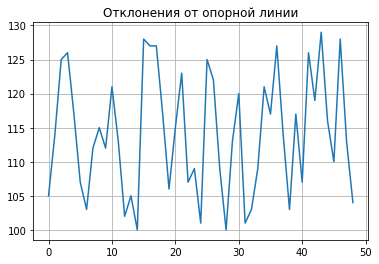

In [ ]:
# Разброс в виде графика
pd.Series(delta_time).plot(title='Отклонения от опорной линии', grid='true')

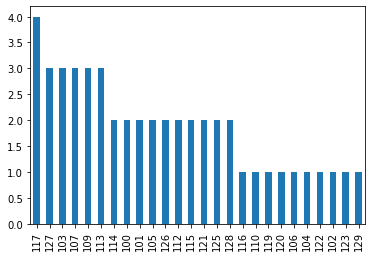

In [ ]:
pd.Series(delta_time).value_counts().plot(kind='bar')

In [ ]:
# получаем условную матрицу позиций, которые больше указанного параметра
delta_time>120

array([False, False,  True,  True,  True,  True, False, False, False,
       False,  True, False, False, False,  True, False,  True, False,
       False,  True,  True, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True,  True, False,
        True, False, False, False])

In [ ]:
# получаем набор правых точек промежутков, на которых зафиксировано превышение периода
u_time[1:][delta_time>120]

array([1592020872, 1592021000, 1592021123, 1592021245, 1592021807,
       1592022248, 1592022485, 1592022833, 1592022955, 1592023515,
       1592025385, 1592025514, 1592025744])

In [ ]:
dtime = pd.DataFrame( {'DTime' : delta_time} )

dtime.sample(5)

,DTime
15,128
37,114
29,113
22,107
46,128


In [ ]:
dtime['DTime'].min()

100

In [ ]:
dtime['DTime'].max()

129

In [ ]:
round(dtime['DTime'].mean(), 1)

114.1

## END